# eBOSS Quasar Luminosity Function Fitting

In [1]:
import corner
import h5py
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from astropy.cosmology import Planck15

from conf import PATHEXT, PATHIN, PATHOUT
from horizonground.lumfunc_likelihood import LumFuncLikelihood, LumFuncMeasurements
from horizonground.lumfunc_modeller import LumFuncModeller, quasar_PLE_lumfunc, quasar_hybrid_lumfunc
from horizonground.utils import process_header

## eBOSS QSO luminosity function data

In [2]:
luminosity_function_data = LumFuncMeasurements(
    PATHEXT/"eBOSS_QSO_LF_measurements.txt", PATHEXT/"eBOSS_QSO_LF_uncertainties.txt", 
    base10_log=False
)

In [3]:
magnitude_bins = luminosity_function_data.luminosity_bins
redshift_bins = luminosity_function_data.redshift_bins
redshift_labels = luminosity_function_data.redshift_labels

## QSO luminosity function fitted models

In [4]:
reference_model = LumFuncModeller.from_parameter_file(
    parameter_file=PATHIN/"cabinet"/"QSO_LF_PLE_model_fixed.txt",
    model_lumfunc=quasar_PLE_lumfunc,
    luminosity_variable='magnitude',
    threshold_value=-21.80,
    cosmology=Planck15    
)

In [5]:
refitted_model_poisson = LumFuncModeller.from_parameter_file(
    parameter_file=PATHIN/"cabinet"/"QSO_LF_PLE_model_poisson.txt",
    model_lumfunc=quasar_PLE_lumfunc,
    luminosity_variable='magnitude',
    threshold_value=-21.80,
    cosmology=Planck15    
)

In [6]:
refitted_model_symlg = LumFuncModeller.from_parameter_file(
    parameter_file=PATHIN/"cabinet"/"QSO_LF_PLE_model_symlg.txt",
    model_lumfunc=quasar_PLE_lumfunc,
    luminosity_variable='magnitude',
    threshold_value=-21.80,
    cosmology=Planck15    
)

## QSO luminosity function fitted model $\chi^2$ comparison

In [7]:
from IPython.display import display, Math

In [8]:
lglumfunc_loglikelihood = LumFuncLikelihood(
    quasar_PLE_lumfunc,
    measurement_file=PATHEXT/"eBOSS_QSO_LF_measurements.txt",
    uncertainty_file=PATHEXT/"eBOSS_QSO_LF_uncertainties.txt",
    prior_file=PATHIN/"QSO_LF_PLE_model_prior.txt",
    prescription='symlg'
)

dof = len(lglumfunc_loglikelihood.data_vector) - len(lglumfunc_loglikelihood.prior)

chisq_symlg_fit = - 2 * lglumfunc_loglikelihood(refitted_model_symlg.attrs['model_parameters'].values())
display(Math(
    r"\text{{refitted model (symmetric log): }} \chi^2 = {:.3f}/{} = {:.5f}"
    .format(chisq_symlg_fit, dof, chisq_symlg_fit / dof)
))

chisq_poisson_fit = - 2 * lglumfunc_loglikelihood(refitted_model_poisson.attrs['model_parameters'].values())
display(Math(
    r"\text{{refitted model (Poisson): }} \chi^2 = {:.3f}/{} = {:.5f}".
    format(chisq_poisson_fit, dof, chisq_poisson_fit / dof)
))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

In [9]:
lumfunc_loglikelihood = LumFuncLikelihood(
    quasar_PLE_lumfunc,
    measurement_file=PATHEXT/"eBOSS_QSO_LF_measurements.txt",
    uncertainty_file=PATHEXT/"eBOSS_QSO_LF_uncertainties.txt",
    prior_file=PATHIN/"QSO_LF_PLE_model_prior.txt",
    prescription='native'
)

dof = len(lumfunc_loglikelihood.data_vector) - len(lumfunc_loglikelihood.prior)

chisq_symlg_fit = - 2 * lumfunc_loglikelihood(refitted_model_symlg.attrs['model_parameters'].values())
display(Math(
    r"\text{{refitted model (symmetric log): }} \chi^2 = {:.3f}/{} = {:.5f}"
    .format(chisq_symlg_fit, dof, chisq_symlg_fit / dof)
))

chisq_poisson_fit = - 2 * lumfunc_loglikelihood(refitted_model_poisson.attrs['model_parameters'].values())
display(Math(
    r"\text{{refitted model (Poisson): }} \chi^2 = {:.3f}/{} = {:.5f}".
    format(chisq_poisson_fit, dof, chisq_poisson_fit / dof)
))

<IPython.core.display.Math object>

<IPython.core.display.Math object>

## eBoss QSO luminosity function sampled models

In [10]:
# burnin, reduce = 10000, 30
# with h5py.File(PATHOUT/"cabinet"/"eBOSS_QSO_LF_PLE_zeus_1512631_32_5E5_by1.h5", 'r') as chain_data:
#     chain = chain_data['mcmc']['chain'][()]
#     nparam = chain.shape[-1]
#     chain_flat = chain[:, burnin::reduce, :].reshape((-1, nparam))

In [11]:
# with open(PATHIN/"cabinet"/"QSO_LF_PLE_model_fixed.txt") as f:
#     param_names = process_header(f.readline())

# one_sigma_quantiles = np.asarray([
#     corner.quantile(chain[:, i], q=[0.1587, 0.8413])
#     for i in range(nparam)
# ])

# reference_quantiles = np.asarray([
#     [-26.86, -26.56], [-6.08, -5.94],
#     [-4.57, -4.05], [-3.16, -2.92], [-1.58, -1.50], [-1.45, -1.31],
#     [-0.16, 0.00], [-0.34, -0.16], [-0.45, -0.35], [-0.11, 0.01]
# ])

# within_one_sigma_models = [
#     model_point for model_point in chain_flat
#     if np.all(model_point > one_sigma_quantiles[:, 0])
#     and np.all(model_point < one_sigma_quantiles[:, 1])
# ]

# within_reference_models = [
#     model_point for model_point in chain_flat
#     if np.all(model_point > reference_quantiles[:, 0])
#     and np.all(model_point < reference_quantiles[:, 1])
# ]

# sampled_models = [
#     LumFuncModeller(
#         model_lumfunc=quasar_PLE_lumfunc,
#         model_parameters=dict(zip(param_names, model_point.tolist())),
#         luminosity_variable='magnitude',
#         threshold_value=-21.80,
#         cosmology=Planck15,
#     )
#     for model_point in within_one_sigma_models
# ]

In [12]:
# print(
#     "{} models within 1-sigma.".format(len(within_one_sigma_models)),
#     "Proportion of all models: {:.1f}%.".format(100 * len(within_one_sigma_models) / len(chain_flat))
# )
# print(
#     "{} models within reference.".format(len(within_reference_models)),
#     "Proportion of all models: {:.1f}%.".format(100 * len(within_reference_models) / len(chain_flat))
# )

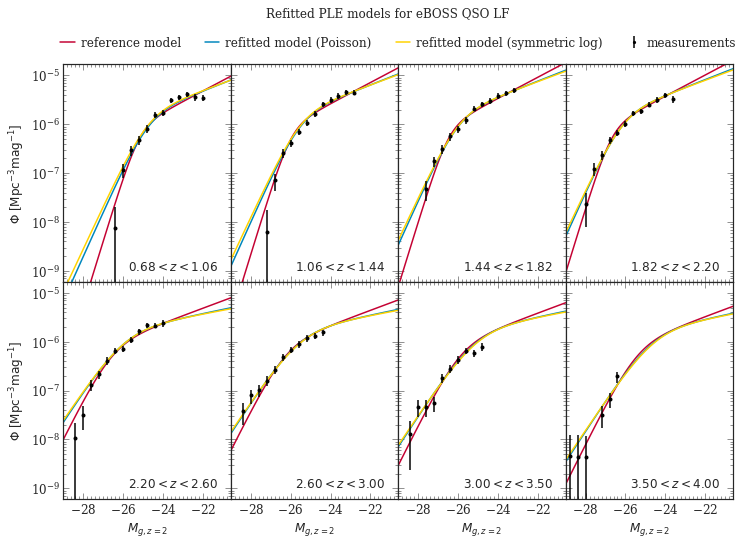

In [13]:
MAGNITUDE_RANGE = -29.0, -20.6
DENSITY_RANGE = pow(10, -9.225), pow(10, -4.775)
NUM_INTERVALS = 100

m = np.linspace(*MAGNITUDE_RANGE, num=NUM_INTERVALS+1)

NUM_ROW, NUM_COL = 2, 4
ROW_SPAN, COL_SPAN = 4, 3

fig = plt.figure(figsize=(12, 8))
for bin_idx, redshift in enumerate(redshift_bins):
    # Set up subplots/
    row_idx, col_idx = bin_idx // NUM_COL, bin_idx % NUM_COL
    
    ax = plt.subplot2grid(
        (NUM_ROW * ROW_SPAN, NUM_COL * COL_SPAN), (row_idx * ROW_SPAN, col_idx * COL_SPAN), 
        rowspan=ROW_SPAN, colspan=COL_SPAN
    )
    
    # Plot data and models.
    data_values, data_errors = luminosity_function_data[bin_idx]
    if bin_idx == 0:
        plt.errorbar(
            magnitude_bins, data_values, data_errors,
            fmt='o', markersize=4., capsize=0., zorder=2, label='measurements'
        )
        plt.plot(
            m, reference_model.luminosity_function(m, redshift), 
            zorder=1, label='reference model'
        )
        plt.plot(
            m, refitted_model_poisson.luminosity_function(m, redshift),
            zorder=1, label='refitted model (Poisson)'
        )
        plt.plot(
            m, refitted_model_symlg.luminosity_function(m, redshift),
            zorder=1, label='refitted model (symmetric log)'
        )
#         for idx, sampled_model in enumerate(sampled_models[-25000::50]):
#             if idx == 0:
#                 rep0 = plt.plot(
#                     m, sampled_model.luminosity_function(m, redshift), 
#                     zorder=2, label='PLE model (this work)'
#                 )
#             else:
#                 plt.plot(
#                     m, sampled_model.luminosity_function(m, redshift), 
#                     c=rep0[0].get_color(), alpha=0.05, zorder=2
#                 )
    else:
        plt.errorbar(
            magnitude_bins, data_values, data_errors,
            fmt='o', markersize=4., capsize=0., zorder=2,
        )
        plt.plot(m, reference_model.luminosity_function(m, redshift), zorder=1)
        plt.plot(m, refitted_model_poisson.luminosity_function(m, redshift), zorder=1)
        plt.plot(m, refitted_model_symlg.luminosity_function(m, redshift), zorder=1)
#         for idx, sampled_model in enumerate(sampled_models[-25000::50]):
#             if idx == 0:
#                 repn = plt.plot(m, sampled_model.luminosity_function(m, redshift), zorder=2)
#             else:
#                 plt.plot(
#                     m, sampled_model.luminosity_function(m, redshift), 
#                     c=repn[0].get_color(), alpha=0.05, zorder=2
#                 )
                
    # Set up axes.
    plt.xscale('linear')
    plt.xlim(*MAGNITUDE_RANGE)
    
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2.))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(0.2))
    if row_idx + 1 < NUM_ROW:
        plt.tick_params(axis='x', which='both', direction='in', labelbottom=False, labelsize=2)
    else:
        plt.xlabel(r"$M_{g,z=2}$")
        
    plt.yscale('log')    
    plt.ylim(*DENSITY_RANGE)
    
    if col_idx > 0:
        plt.tick_params(axis='y', which='both', direction='in', labelleft=False, labelsize=2)
    else:
        plt.ylabel(r"$\Phi$ [$\mathrm{Mpc}^{-3} \mathrm{mag}^{-1}$]")
    
    plt.title(redshift_labels[bin_idx], loc='right', position=(0.925, 0.025))

lines, labels = [], []
for ax in fig.axes:
    ax_line, ax_label = ax.get_legend_handles_labels()
    lines.extend(ax_line)
    labels.extend(ax_label)
    
plt.legend(
    lines, labels, ncol=4, handlelength=1.2, handletextpad=0.5,
    bbox_to_anchor=(-1., 2.1), loc='center'    
)
plt.suptitle("Refitted PLE models for eBOSS QSO LF")
plt.subplots_adjust(hspace=0, wspace=0)